In [10]:
import numpy as np
import matplotlib.pyplot as plt

Federated Learning


Round 1:
Client1: No bias detected. Fairness score: 0.8816326530612244
Client2: No bias detected. Fairness score: 0.9285714285714284
Client3: No bias detected. Fairness score: 1.2767489711934157
Client4: Bias detected! Fairness score: 0.7777777777777778
Client5: No bias detected. Fairness score: 1.1785714285714286
Round 2:
Client1: No bias detected. Fairness score: 0.9285714285714286
Client2: No bias detected. Fairness score: 1.2231040564373898
Client3: No bias detected. Fairness score: 0.9462962962962963
Client4: Bias detected! Fairness score: 0.6740890688259109
Client5: No bias detected. Fairness score: 1.171945701357466
Round 3:
Client1: No bias detected. Fairness score: 1.1981981981981982
Client2: No bias detected. Fairness score: 0.9777777777777779
Client3: No bias detected. Fairness score: 0.9445983379501385
Client4: No bias detected. Fairness score: 1.0321428571428573
Client5: No bias detected. Fairness score: 1.0158730158730158
Round 4:
Client1: No bias detected. Fairness score

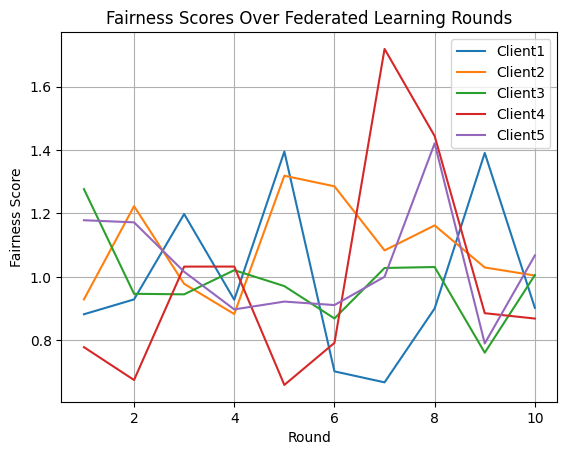

In [11]:
# Simulated federated learning clients 
clients = ["Client1", "Client2", "Client3", "Client4", "Client5"]

# Lists to store fairness scores for each client in each round
client_fairness_scores = {client: [] for client in clients}

# Simulated fairness metric
def fairness_metric(predictions, protected_group):
    # Compute fairness metric
    group_positive = sum(predictions[protected_group])
    group_negative = len(predictions[protected_group]) - group_positive
    total_positive = sum(predictions)
    total_negative = len(predictions) - total_positive
    return (group_positive / total_positive) / (group_negative / total_negative)

# Simulated federated learning rounds
num_rounds = 10
for round in range(num_rounds):
    print(f"Round {round + 1}:")

    # Lists to store fairness scores for this round
    round_fairness_scores = []

    # Simulate model training on clients
    for client in clients:
        predictions = np.random.choice([0, 1], size=100, p=[0.7, 0.3])

        # Simulated protected group
        protected_group = np.random.choice([True, False], size=100)

        # Calculate fairness metric for this client's predictions
        fairness_score = fairness_metric(predictions, protected_group)

        # Store the fairness score for this client in this round
        round_fairness_scores.append(fairness_score)

        # Checking for bias
        if fairness_score < 0.8:
            print(f"{client}: Bias detected! Fairness score: {fairness_score}")
        else:
            print(f"{client}: No bias detected. Fairness score: {fairness_score}")

    # Aggregate model updates
    for i, client in enumerate(clients):
        client_fairness_scores[client].append(round_fairness_scores[i])

# Fairness scores over rounds for each client
for client in clients:
    plt.plot(range(1, num_rounds + 1), client_fairness_scores[client], label=client)

plt.xlabel("Round")
plt.ylabel("Fairness Score")
plt.title("Fairness Scores Over Federated Learning Rounds")
plt.legend()
plt.grid(True)
plt.show()
